# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 563


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + (city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | jhargram
Processing Record 3 of Set 1 | yuzhno-kurilsk
Processing Record 4 of Set 1 | coquimbo
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | muynoq
Processing Record 7 of Set 1 | hammerfest
Processing Record 8 of Set 1 | tangalle
Processing Record 9 of Set 1 | severo-yeniseyskiy
Processing Record 10 of Set 1 | saint-francois
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | flin flon
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | bilajer
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | anadyr
Processing Record 18 of Set 1 | pantelho
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | oriximina
Processing Record 21 of Set 1 | taguatinga
Processing Record 22 of Set

Processing Record 43 of Set 4 | novosilikatnyy
Processing Record 44 of Set 4 | faxinal
Processing Record 45 of Set 4 | saudarkrokur
Processing Record 46 of Set 4 | katsina-ala
Processing Record 47 of Set 4 | east london
Processing Record 48 of Set 4 | antalaha
Processing Record 49 of Set 4 | badger
Processing Record 0 of Set 5 | tezu
Processing Record 1 of Set 5 | yanchep
Processing Record 2 of Set 5 | isakogorka
City not found. Skipping...
Processing Record 3 of Set 5 | gundelsheim
Processing Record 4 of Set 5 | st. john's
Processing Record 5 of Set 5 | shangri-la
City not found. Skipping...
Processing Record 6 of Set 5 | armidale
Processing Record 7 of Set 5 | porto seguro
Processing Record 8 of Set 5 | acarau
Processing Record 9 of Set 5 | labrador city
Processing Record 10 of Set 5 | kimbe
Processing Record 11 of Set 5 | remire-montjoly
Processing Record 12 of Set 5 | sandnessjoen
Processing Record 13 of Set 5 | thinadhoo
Processing Record 14 of Set 5 | marang
Processing Record 15 

Processing Record 34 of Set 8 | cascais
Processing Record 35 of Set 8 | sanctuary point
Processing Record 36 of Set 8 | punta del este
Processing Record 37 of Set 8 | buulobarde
Processing Record 38 of Set 8 | thanh hoa
Processing Record 39 of Set 8 | mandalgovi
Processing Record 40 of Set 8 | howard springs
Processing Record 41 of Set 8 | lorengau
Processing Record 42 of Set 8 | manaus
Processing Record 43 of Set 8 | el nido
Processing Record 44 of Set 8 | zouerate
Processing Record 45 of Set 8 | ipilan
Processing Record 46 of Set 8 | veinticinco de mayo
Processing Record 47 of Set 8 | kavaratti
Processing Record 48 of Set 8 | guerrero negro
Processing Record 49 of Set 8 | hovd
Processing Record 0 of Set 9 | zheleznodorozhnyy
Processing Record 1 of Set 9 | inhambane
Processing Record 2 of Set 9 | xining
Processing Record 3 of Set 9 | kerikeri
Processing Record 4 of Set 9 | bathsheba
Processing Record 5 of Set 9 | allonnes
Processing Record 6 of Set 9 | khorixas
Processing Record 7 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.35,78,7,8.58,TF,1691575893
1,jhargram,22.4500,86.9833,32.90,57,57,3.70,IN,1691575893
2,yuzhno-kurilsk,44.0306,145.8556,20.04,99,100,5.54,RU,1691575893
3,coquimbo,-29.9533,-71.3436,12.85,94,100,3.09,CL,1691575397
4,ust-nera,64.5667,143.2000,17.48,59,91,1.24,RU,1691575893


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.35,78,7,8.58,TF,1691575893
1,jhargram,22.4500,86.9833,32.90,57,57,3.70,IN,1691575893
2,yuzhno-kurilsk,44.0306,145.8556,20.04,99,100,5.54,RU,1691575893
3,coquimbo,-29.9533,-71.3436,12.85,94,100,3.09,CL,1691575397
4,ust-nera,64.5667,143.2000,17.48,59,91,1.24,RU,1691575893


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

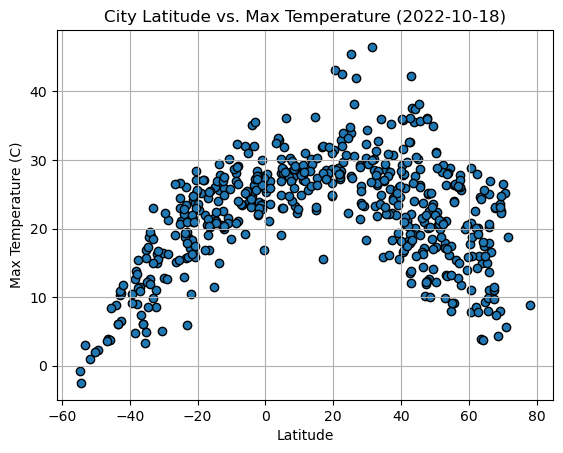

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", edgecolor="black")

#Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

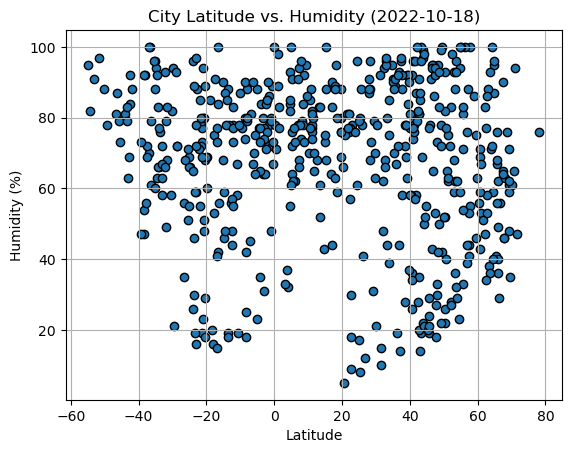

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

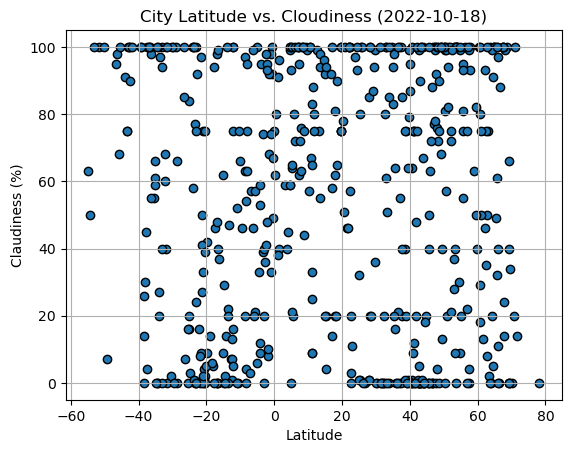

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Claudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

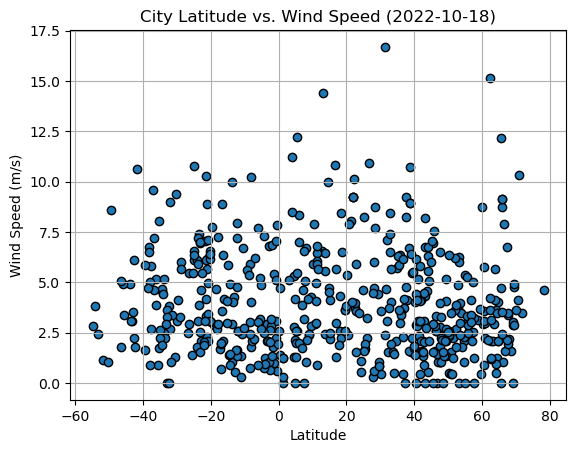

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, title, y_label, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

    # Label plot
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Show plot
    plt.show()

In [56]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jhargram,22.4500,86.9833,32.90,57,57,3.70,IN,1691575893
2,yuzhno-kurilsk,44.0306,145.8556,20.04,99,100,5.54,RU,1691575893
4,ust-nera,64.5667,143.2000,17.48,59,91,1.24,RU,1691575893
5,muynoq,43.7683,59.0214,35.60,22,0,4.55,UZ,1691575893
6,hammerfest,70.6634,23.6821,25.25,65,20,4.12,NO,1691575893


In [57]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.35,78,7,8.58,TF,1691575893
3,coquimbo,-29.9533,-71.3436,12.85,94,100,3.09,CL,1691575397
10,puerto natales,-51.7236,-72.4875,0.99,97,100,1.16,CL,1691575668
14,edinburgh of the seven seas,-37.0676,-12.3116,11.44,70,100,9.59,SH,1691575916
15,blackmans bay,-43.0167,147.3167,10.29,63,100,3.50,AU,1691575916


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.2713179333971246


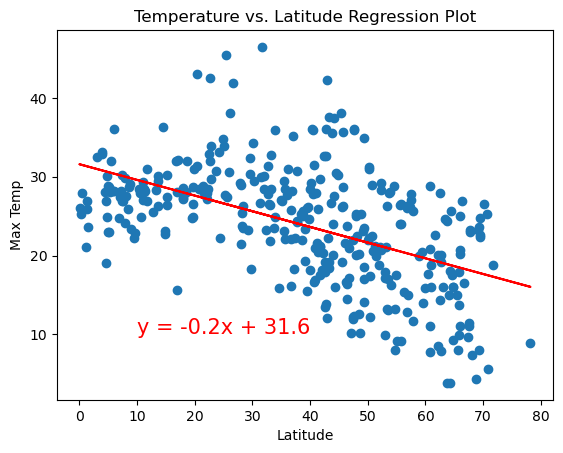

In [58]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression_plot(x_values, y_values, "Temperature vs. Latitude Regression Plot", "Max Temp", (10,10))

R squared: 0.684826393738972


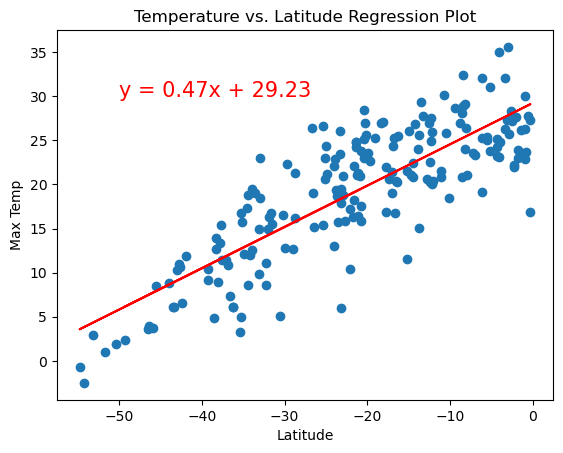

In [62]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression_plot(x_values, y_values, "Temperature vs. Latitude Regression Plot", "Max Temp", (-50,30))

**Discussion about the linear relationship:** 
In the northern hemisphere, latitude and temperature have a negative correlation. As the latitude increases, the max temperature decreases. The opposite happens in the southern hemisphere. When latitude increases, the max temperature also increases. This shows a positive correlation between latitude and temperature in the southern hemisphere

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.030845908165144764


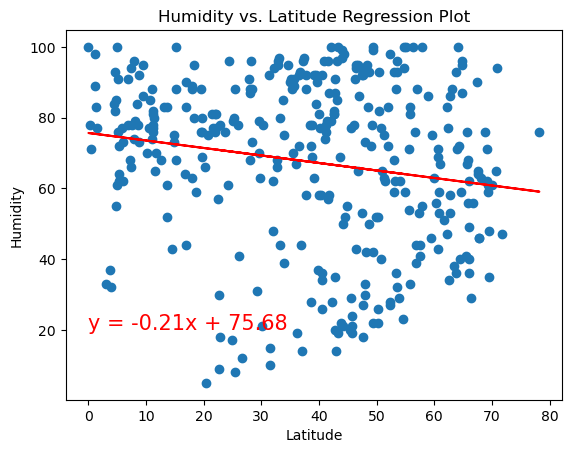

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

linear_regression_plot(x_values, y_values, "Humidity vs. Latitude Regression Plot", "Humidity", (0,20))

R squared: 0.027512107885132694


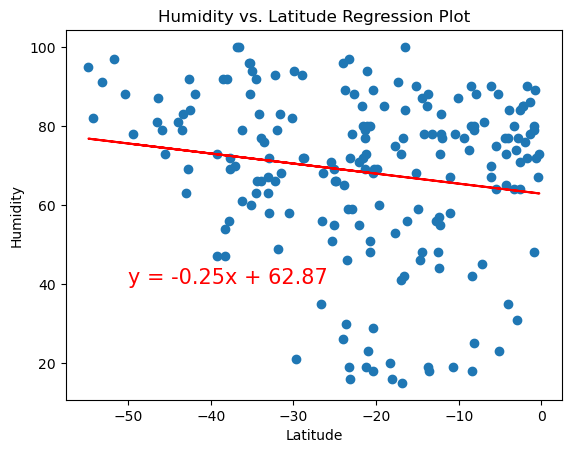

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

linear_regression_plot(x_values, y_values, "Humidity vs. Latitude Regression Plot", "Humidity", (-50,40))

**Discussion about the linear relationship:** 
According to our plot and the regression line calculated, humidity and latitude have slight negative correlation. The line shows that as latitude increases, humidity decreases. The same correlation is exhibited in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.013056112367702894


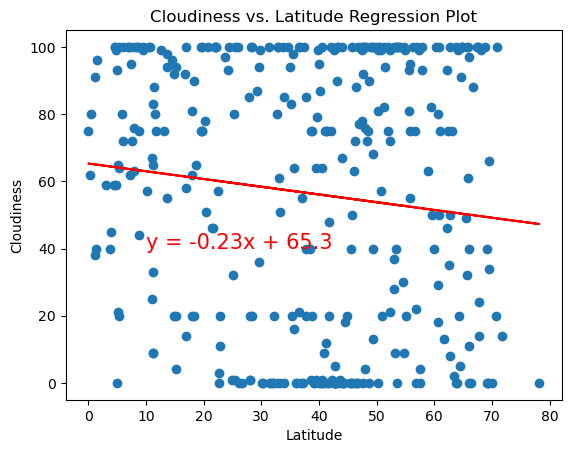

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

linear_regression_plot(x_values, y_values, "Cloudiness vs. Latitude Regression Plot", "Cloudiness",(10,40))

R squared: 0.040234102421800894


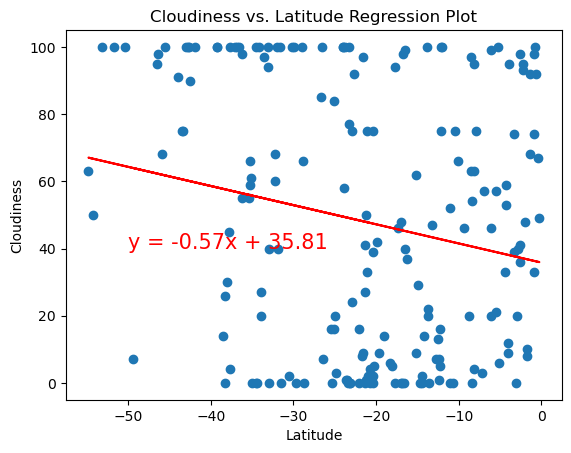

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression_plot(x_values, y_values, "Cloudiness vs. Latitude Regression Plot", "Cloudiness", (-50, 40))

**Discussion about the linear relationship:**
According to our plot and the regression line calculated, cloudiness and latitude hace a negative correlation in both northern and shouthern hemispheres. However, the r^2 value for both is less than 5% indicating that cloudiness vs latitude has low variability.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.01803538435409413


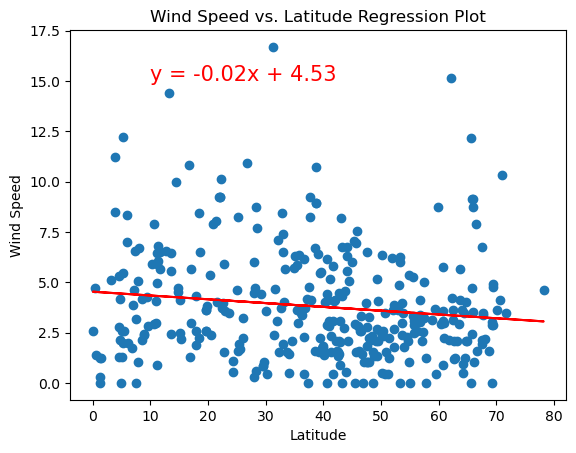

In [72]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

linear_regression_plot(x_values, y_values, "Wind Speed vs. Latitude Regression Plot", "Wind Speed", (10,15))

R squared: 0.009531427892517649


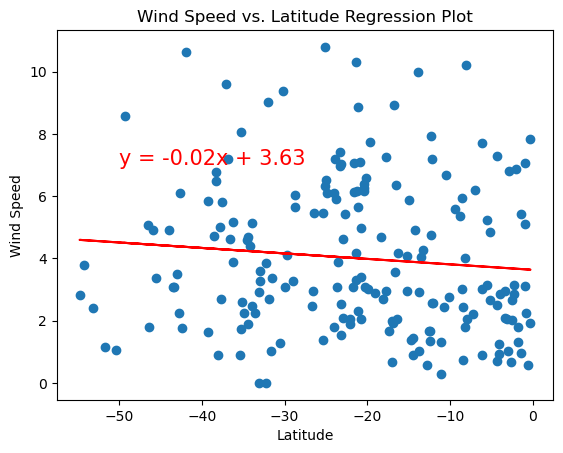

In [73]:
# Southern Hemisphere
# Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression_plot(x_values, y_values, "Wind Speed vs. Latitude Regression Plot", "Wind Speed", (-50,7))

**Discussion about the linear relationship:** 
According to our plot and the regression line calculated, windspeed and latitude hace a negative correlation in both northern and shouthern hemispheres. However, the r^2 value in the southern hemisphere is very small (less than 10 %) indicating low variability between wind speed and latitude. The regression line seems to fit the data a little better in the norther hemisphere, however, r^2 is about 18%.